In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

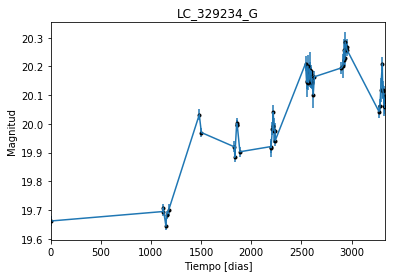

In [2]:
data = np.genfromtxt('LC_329234_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_329234_G')
plt.savefig("LC_329234_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

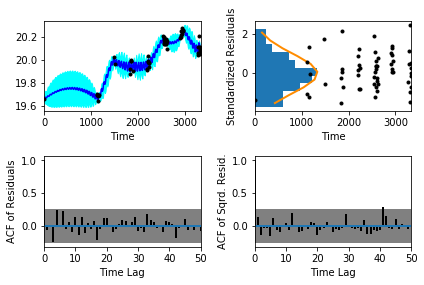

In [5]:
sample.assess_fit()

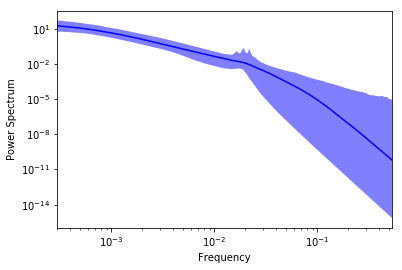

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

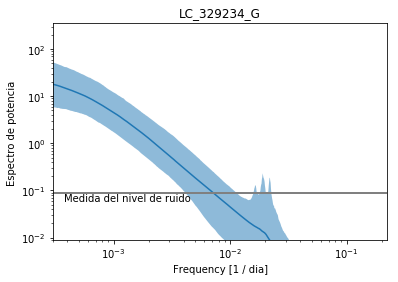

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_329234_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_329234_G')

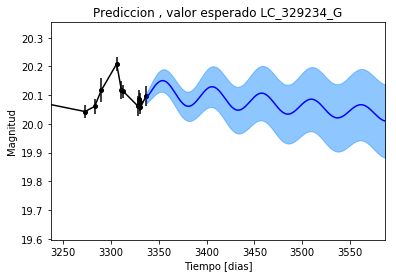

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_329234_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_329234_G')

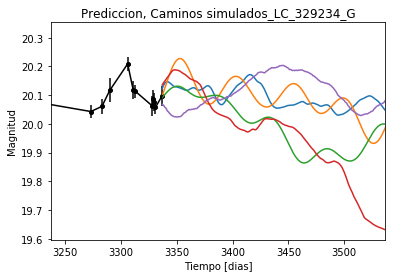

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_329234_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


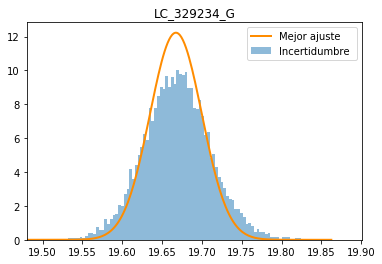

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_329234_G')
plt.savefig("Mejor_ajuste_LC_329234_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_329234_G')

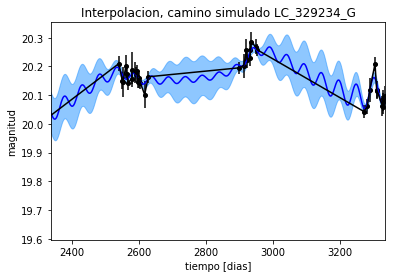

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_G')

Text(0.5,1,'Interpolacion, camino simulado LC_329234_G')

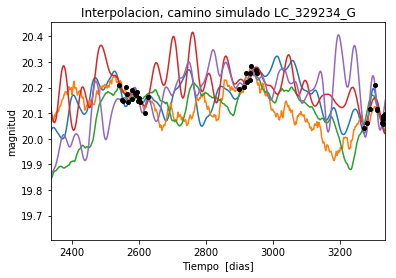

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1402.16852235
Median: 0.00958229642711
Standard deviation: 0.194066462246
68% credibility interval: [ 0.0005415   0.14458636]
95% credibility interval: [  3.24615200e-04   7.80546382e-01]
99% credibility interval: [  3.08494689e-04   1.00115209e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 188.783721185
Median: 0.00352027065721
Standard deviation: 0.083746208772
68% credibility interval: [ 0.00041782  0.03821107]
95% credibility interval: [ 0.00031512  0.23111161]
99% credibility interval: [  3.03554577e-04   6.53834547e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 665.18186313
Median: 0.0360425450213
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 270.071008994
Median: 124.917344055
Standard deviation: 2.42517405447
68% credibility interval: [ 122.69876029  127.1820845 ]
95% credibility interval: [ 119.89205373  129.73744737]
99% credibility interval: [ 117.48625846  130.6565823 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 317.015182812
Median: 0.560681857197
Standard deviation: 2.29635132542
68% credibility interval: [ 0.04205034  3.71651672]
95% credibility interval: [ 0.0189622   8.01117721]
99% credibility interval: [  0.0150269   10.64799017]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 419.408601192
Median: 0.425009366775
Standard deviation: 10.221215507
68% credibility interval: [  0.01733206  10.50133113]
95% credibility interval: [  1.09669953

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 301.580422817
Median: 2.16345056143e-16
Standard deviation: 4.57434381931e+33
68% credibility interval: [  1.04981151e-40   2.41646124e-03]
95% credibility interval: [  2.39228162e-62   4.20495265e+01]
99% credibility interval: [  4.23335815e-80   5.66659330e+33]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1468.40798786
Median: 19.9292401182
Standard deviation: 0.0959747260384
68% credibility interval: [ 19.83649567  20.012968  ]
95% credibility interval: [ 19.73174728  20.10975926]
99% credibility interval: [ 19.62326453  20.19427414]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 244.714182971
Median: 0.0220368662408
Standard deviation: 0.259533214845
68% credibility interval: [ 0.          0.36990601]
95% credibility interval: [ 0.          0.93801581]
99% credibility interval: [ 0.          1.05525691]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 244.714182971
Median: 0.0220368662408
Standard deviation: 0.259533214845
68% credibility interval: [ 0.          0.36990601]
95% credibility interval: [ 0.          0.93801581]
99% credibility interval: [ 0.          1.05525691]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1069.48366807
Median: 0.0
Standard deviation: 0.000186900165158
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 270.071008994
Median: 124.917344055
Standard deviation: 2.42517405447
68% credibility interval: [ 122.69876029  127.1820845 ]
95% credibility interval: [ 119.89205373  129.73744737]
99% credibility interval: [ 117.48625846  130.6565823 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1159.57963897
Median: 0.037422114676
Standard deviation: 0.0228495310791
68% credibility interval: [ 0.02432252  0.05889677]
95% credibility interval: [ 0.01679914  0.10274251]
99% credibility interval: [ 0.01354295  0.14101677]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 706.396589814
Median: 0.852700151497
Standard deviation: 0.147776851151
68% credibility interval: [ 0.72880646  1.0138825 ]
95% credibility interval: [ 0.62998533  1.20260956]
99% credibility interval: [ 0.57038744  1.32828873]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 494.093780466
Median: 0.000796750650374
Standard deviation: 0.145884296577
68% credibility interval: [  6.51592063e-06   3.74842820e-02]
95% credibility interval: [  1.71189159e-06   2.70934154e-01]
99% credibility interval: [  1.98093558e-36   1.11401741e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1402.16852235
Median: (-0.0602073441199-2.72182125708j)
Standard deviation: 2.03617166435
68% credibility interval: [-0.90846291-0.22960089j -0.00340236-0.11877021j]
95% credibility interval: [ -4.90431756e+00+0.j          -2.03961746e-03-0.11936631j]
99% credibility interval: [ -6.29042411e+00+0.j          -1.93832930e-03-0.12085065j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 188.783721185
Median: (-0.0221185128707+0.159197680038j)
Standard deviation: 1.71348945796
68% credibility interval: [-0.24008720+0.35040298j -0.00262527+0.j        ]
95% credibility interval: [-1.45211707+2.75283694j -0.00197998+0.j        ]
99% credibility interval: [ -4.10816362e+00 +2.42699681e+00j  -1.90728966e-03 +5.12601160e-04j]
Pos